In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

sns.set(style="whitegrid")


In [2]:
df = pd.read_csv("Project 2/customer_segmentation.csv")
df.head()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [3]:
df.shape


(2205, 39)

In [4]:
df.info

<bound method DataFrame.info of        Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0     58138.0        0         0       58       635         88   
1     46344.0        1         1       38        11          1   
2     71613.0        0         0       26       426         49   
3     26646.0        1         0       26        11          4   
4     58293.0        1         0       94       173         43   
...       ...      ...       ...      ...       ...        ...   
2200  61223.0        0         1       46       709         43   
2201  64014.0        2         1       56       406          0   
2202  56981.0        0         0       91       908         48   
2203  69245.0        0         1        8       428         30   
2204  52869.0        1         1       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0                 546              172                88            88  ...   
1                

In [5]:
df.describe

<bound method NDFrame.describe of        Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0     58138.0        0         0       58       635         88   
1     46344.0        1         1       38        11          1   
2     71613.0        0         0       26       426         49   
3     26646.0        1         0       26        11          4   
4     58293.0        1         0       94       173         43   
...       ...      ...       ...      ...       ...        ...   
2200  61223.0        0         1       46       709         43   
2201  64014.0        2         1       56       406          0   
2202  56981.0        0         0       91       908         48   
2203  69245.0        0         1        8       428         30   
2204  52869.0        1         1       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0                 546              172                88            88  ...   
1              

In [7]:
df.isnull().sum

<bound method DataFrame.sum of       Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0      False    False     False    False     False      False   
1      False    False     False    False     False      False   
2      False    False     False    False     False      False   
3      False    False     False    False     False      False   
4      False    False     False    False     False      False   
...      ...      ...       ...      ...       ...        ...   
2200   False    False     False    False     False      False   
2201   False    False     False    False     False      False   
2202   False    False     False    False     False      False   
2203   False    False     False    False     False      False   
2204   False    False     False    False     False      False   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0               False            False             False         False  ...   
1               False         

In [8]:
df = df.dropna()

In [9]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [11]:
features = df[['Income', 'Age', 'MntTotal']]


In [12]:
features.isnull().sum()


Income      0
Age         0
MntTotal    0
dtype: int64

In [13]:
features = features.fillna(features.mean())

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

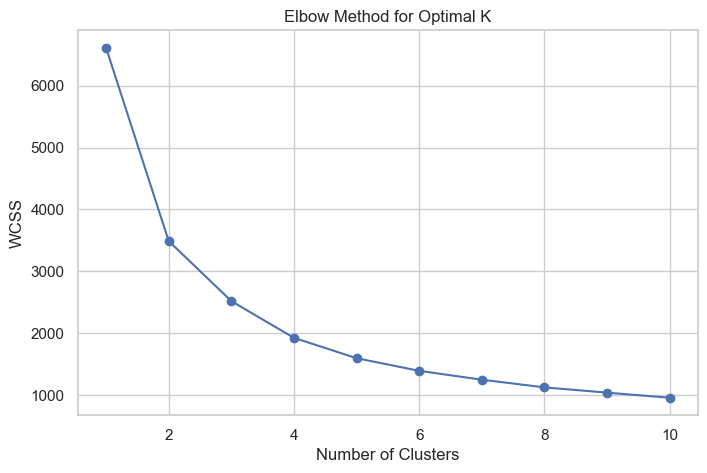

In [16]:
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


In [17]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)


In [18]:
df.groupby('Cluster')[['Income', 'Age', 'MntTotal']].mean()


,Income,Age,MntTotal
Cluster,,,
0,74221.449782,49.950509,1272.323144
1,33828.625998,43.424173,122.887115
2,51745.519501,62.819033,404.115445


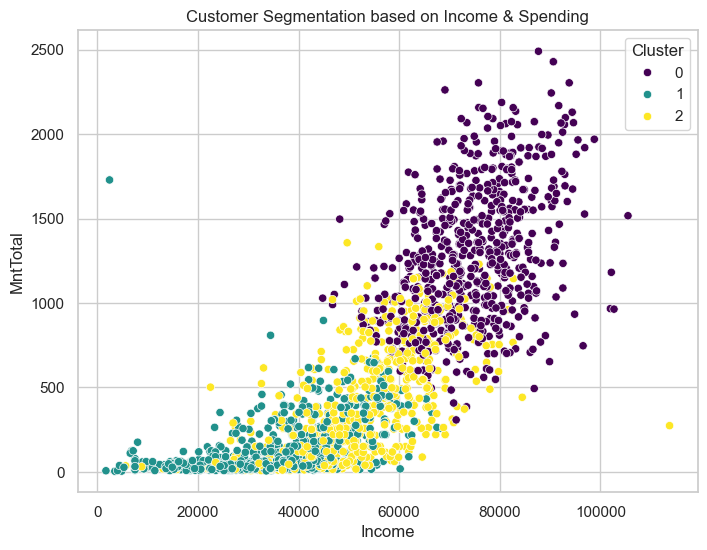

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['Income'],
    y=df['MntTotal'],
    hue=df['Cluster'],
    palette='viridis'
)
plt.title("Customer Segmentation based on Income & Spending")
plt.show()

In [20]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)


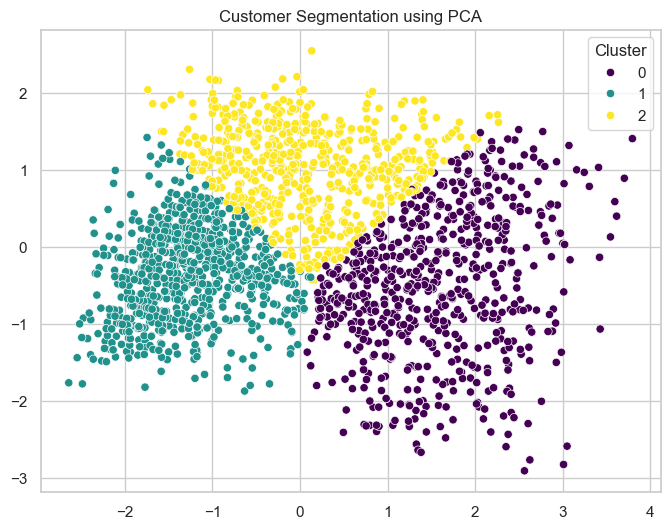

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=pca_features[:,0],
    y=pca_features[:,1],
    hue=df['Cluster'],
    palette='viridis'
)
plt.title("Customer Segmentation using PCA")
plt.show()


In [22]:
df.to_csv("customer_segmentation_with_clusters.csv", index=False)